In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

plt.rcParams['font.family']='AppleGothic'
plt.rcParams['axes.unicode_minus']=False

# 이진 분류 (binary classification) 

예측을 위한 방정식  
$\hat{y}=w[0]\times x[0] + w[1]\times x[1]+\dots+w[p]\times x[p] + b >0$  
특성들의 예측한 값을 임계치 0과 비교함.  
    - 함수에서 계산한 값이 0보다 작으면 ==> 클래스 -1, -보다 크면 ==> +1    

- 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수.  
- 손실함수 (loss function)에 대한 차이는 크게 중요하지 않음.  

선형 분류 알고리즘  
- 로지스틱 회귀 (logistic regression)
- 서포트 벡터 머신 (support vector machine)

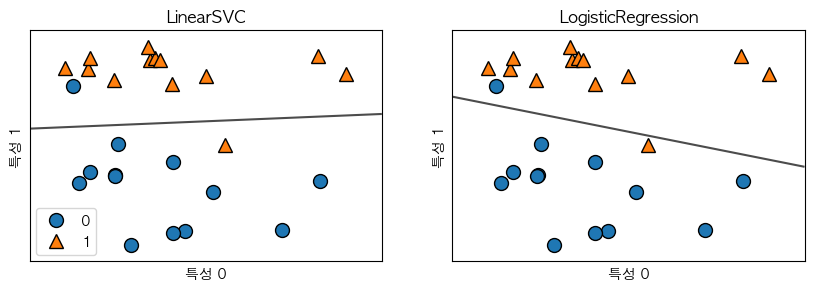

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5, ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

두 모델은 기본적으로 L2 규제 사용  
규제의 강도는 매개변수 C를 통해 결정. C가 높아지면 규제가 감소함.  

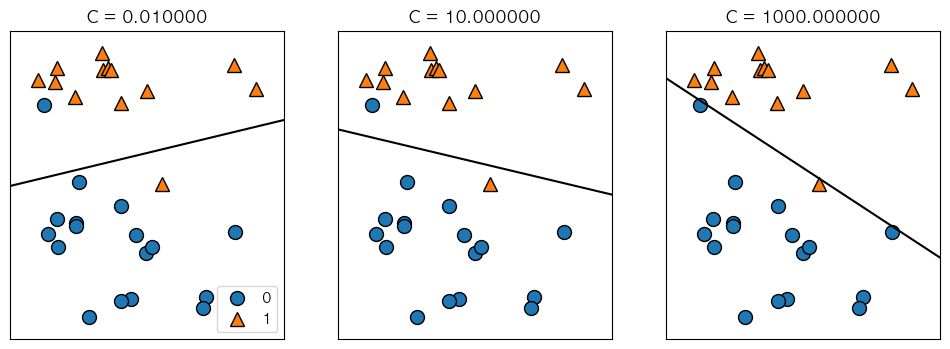

In [5]:
mglearn.plots.plot_linear_svc_regularization()

## 유방암 데이터셋을 사용한 LogisticRegression

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.958


In [7]:
# C 증가 ==> 복잡도가 높은 모델일수록 성능이 좋음
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수 : 0.984
테스트 세트 점수 : 0.965


/Users/isumi/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# C= 0.01  ==> 과소적합되어 훈련세트와 테스트 세트의 정확도는 기본 매개변수일때보다는 낮아짐
logreg001 = LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수 : {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수 : 0.953
테스트 세트 점수 : 0.951


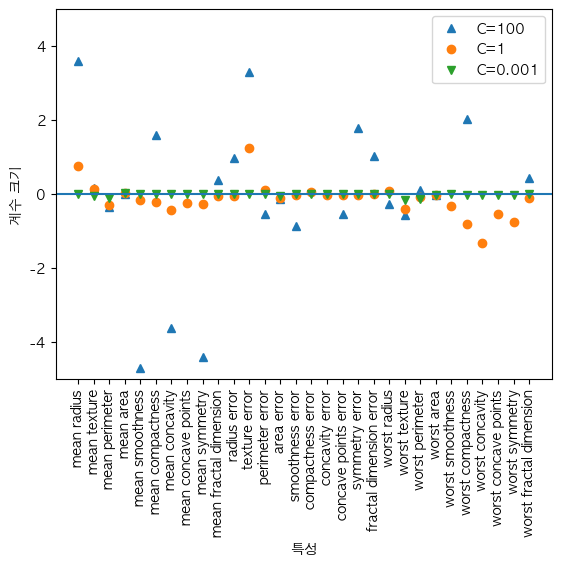

In [10]:
# model's coefficients depends on regularization parameter C 

plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.001')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

L1 규제 사용

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도 : 0.98


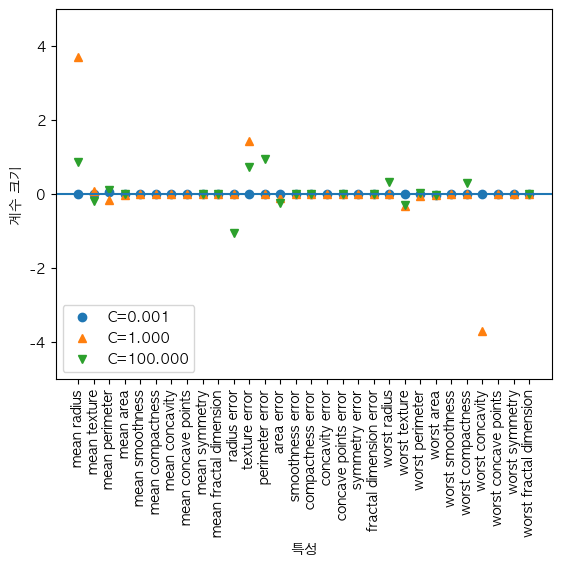

In [11]:
for C, marker in zip ([0.001,1,100],['o','^','v']):
    lr_l1=LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

# 다중 클래스 분류용 선형 모델

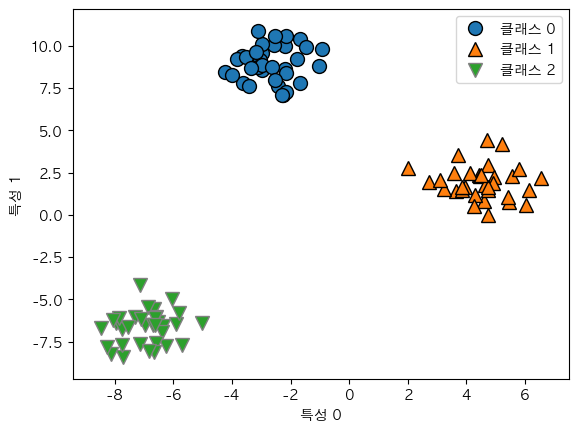

In [12]:
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


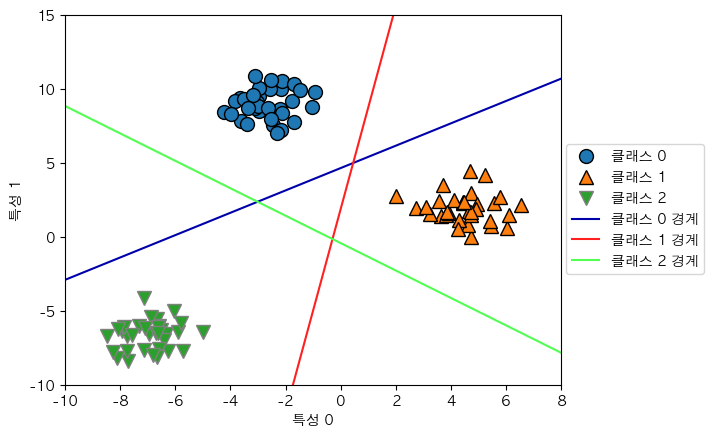

In [14]:
# Linear SVC 분류기
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기 : ",linear_svm.coef_.shape)
print("절편 배열의 크기 : ",linear_svm.intercept_.shape) # 각 클래스의 절편을 담은 1차원 벡터

# 세 개의 이진 분류기가 만드는 경계 시각화
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_,linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))

Text(0, 0.5, '특성 1')

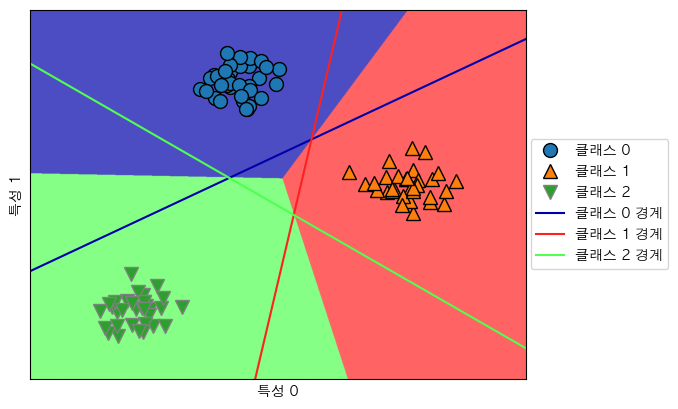

In [16]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- 선형 모델은 학습 속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터셋에도 잘 작동함.  
- 대용량 데이터셋이라면 기본 설정보다 잘 처리하도록 LogisticRegression 과 Ridge 에 solver='sag' 옵션을 준다. 

- 선형 모델은 회귀 & 분류 공식을 사용해 예측이 어떻게 만들어지는지 비교적 쉽게 이해할 수 있다.  
- 그러나 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있다. (데이터셋의 특성들이 서로 깊게 연관되어 있을 때)

- 선형 모델은 샘플에 비해 특성이 많을 때 잘 작동함. 

In [17]:
# 커널 서포트 벡터 머신 에서 선형 모델이 실패하는 예  
logreg = LogisticRegression().fit(X_train,y_train)
# fit 메서드의 반환값은 학습된 모델로, 변수 logreg 에 할당. 
# 이렇게 메서드 호출을 잇는것을 메서드 연결 (method chaining) 이라고 한다. 

logreg = LogisticRegression()
y_pred = logreg.fit(X_train,y_train).predict(X_test)

# 모델의 객체를 만들고, 훈련하고, 예측하는 일을 모두 한 줄에 쓸 수 있다.
y_pred = LogisticRegression().fit(X_train,y_train).predict(X_test)

/Users/isumi/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/isumi/anaconda3/envs/ML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

# 확률적 경사 하강법 (Stochastic Gradient Descent) 

- SGDClassifier 와 SGDRegressor 는 확률적 경사 하강법을 사용하여 다양한 선형 모델을 훈련함. 
- loss 매개변수에 최적화할 손실 함수를 지정
- SGDClassifier 의 loss 기본값은 힌지 손실인 'hinge' 이며 서포트 벡터 머신 모델을 훈련함. 
- loss 를 'log_loss' 로 지정하면 로지스틱 회귀 모델을 훈련함.
- SGDRegressor 의 loss 매개변수 기본값은 'squared_error'로 릿지 모델을 훈련함. 

- SGDClassifier 와 SGDRegressor 의 penaly 매개변수에는 'll', 'l2', 'elasticnet'을 지정할 수 있으며 기본은 'l2' 
    - 모두 alpha 로 매개변수 조정. 기본ㄱ밧은 0.0001 이며 값이 클수록 규제 강도가 높아짐.
- 알고리즘 반복 횟수는 max_iter 매개변수로 지정하며 기본값은 1.000 
    - 매개변수의 기본값은 Flas 로 n_iter_no_change (기본값 5) 에 지정한 반복 동안 훈련 세트 점수가 적어도 tol(기본값 1e-3)에 지정한 값만큼 향상되지 않으면 훈련을 종료.
- 확률적 경사 하강법의 학습률은 learning_rate 매개변수로 지정함. 
    - 기본값은 'optional' 로 반복횟수에 따라 비례적으로 감소함
    - 'constant' 는 eta0 매개변수에 지정한 값을 사용함.
    - eta0 의 기본값은 0
    - 'invscaling'은 eta0에서 시작하여 지수적으로 감소함. 

- 확률적 경사 하강법
    - 장점 : 대용량 데이터에 사용할 수 있고 속도가 빠름
    - 단점 : 튜닝할 하이퍼파라미터가 많고 특성 스케일에 민감함. 

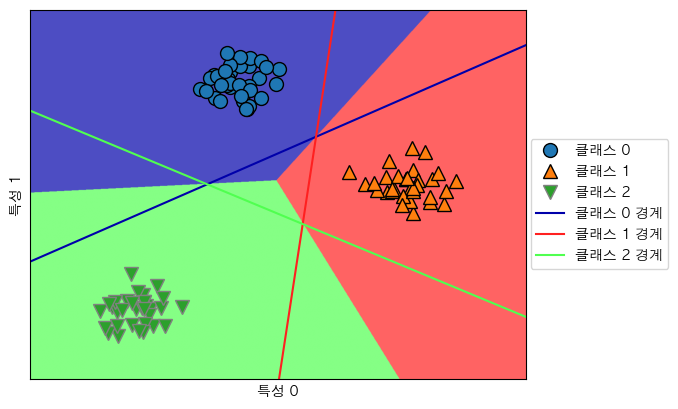

In [18]:
# SGDClassifier 훈련
from sklearn.linear_model import SGDClassifier 

sgd_c = SGDClassifier(alpha=0.01,learning_rate='adaptive',eta0=0.1,random_state=42,n_jobs=1)
sgd_c.fit(X,y)

mglearn.plots.plot_2d_classification(sgd_c,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(sgd_c.coef_,sgd_c.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()
           

In [19]:
# 확장된 보스턴 데이터셋에 SGDRegressor 모델을 훈련

from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
sgd_r = SGDRegressor(learning_rate='adaptive',eta0=0.1,random_state=42)
sgd_r.fit(X_train,y_train)

print("훈련 세트 점수 :{:.2f}".format(sgd_r.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(sgd_r.score(X_test,y_test)))

훈련 세트 점수 :0.90
테스트 세트 점수 : 0.82


# 나이브 베이즈 (naive bayes) 분류기 

- LogisticRegression 이나 LinearSVC 같은 선형 분류기보다 훈련 속도가 빠른편이지만 일반화 성능이 조금 떨어짐.  
- 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순 취합  
- scikit-learn에 구현된 나이브 베이즈 분류기 
    - GaussianNB : 연속적인 어떤 데이터에도 적용 가능, 클래스 별로 각 특성의 분산과 평균을 저장
    - BernoulliNB : 이진 데이터, 텍스트 데이터
    - MultinomialNB : 카운트 데이터에 적용, 텍스트 데이터, 클래스 별로 평균 계산

- Multinominal 과 Bernoulli 의 예측 공식은 선형 모델과 형태가 같음. 
- 나이브 베이즈 모델의 coef_ 는 기울기 w 가 아니라서 선형 모델과는 의미가 다름.

In [21]:
# BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

counts = { }
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label]=X[y==label].sum(axis=0)
print("특성 카운트:\n",counts)


특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


- MultinominalNB 와 BernoulliNB 는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있음
    - alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가함
    - alpha가 크면 더 완만해지고 모델의 복잡도는 낮아짐
    - alpha 에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않음. 
- GaussianNB 는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용함
- MultinominalNB 는 보통 0이 아닌 특성이 비교적 많은 데이터셋에서 BernoulliNB 보다 성능이 높음. 
- 나이브 베이즈 모델과 선형 모델의 장단점은 비슷함
    - 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉬움
    - 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않음

# 결정 트리 (decision tree)

- 분류 & 회귀 문제에 널리 사용하는 문제 

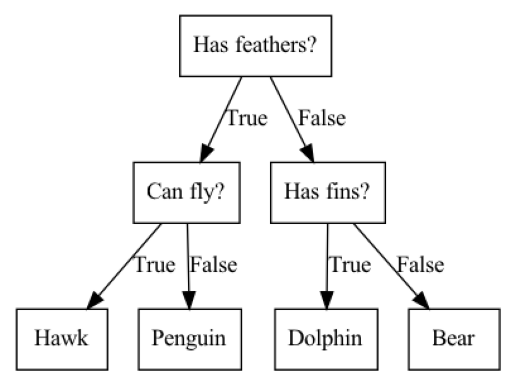

In [25]:
mglearn.plots.plot_animal_tree()